
--- Выполнение заданий для n = 100 ---
Опорные точки (центры интервалов и плотности):
x: 14.92, y: 0.00557
x: 43.66, y: 0.00661
x: 72.41, y: 0.00765
x: 101.15, y: 0.00383
x: 129.89, y: 0.00174
x: 158.63, y: 0.00348
x: 187.38, y: 0.00174
x: 216.12, y: 0.00104
x: 244.86, y: 0.00139
x: 273.60, y: 0.00174
Коэффициенты линейной регрессии: b0 = -4.87724, b1 = -0.00696


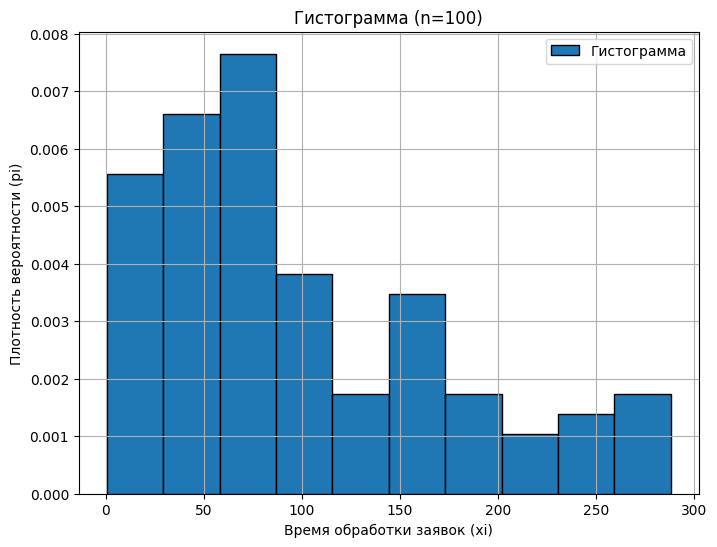

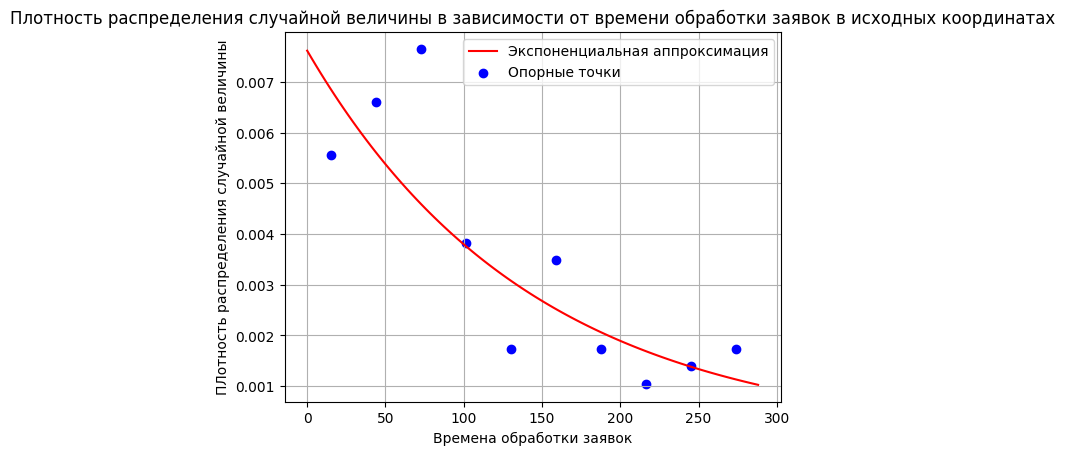

Погрешность коэффициента интенсивности: 30.40%

--- Выполнение заданий для n = 300 ---
Опорные точки (центры интервалов и плотности):
x: 36.58, y: 0.00687
x: 109.36, y: 0.00343
x: 182.14, y: 0.00169
x: 254.92, y: 0.00087
x: 327.70, y: 0.00055
x: 400.48, y: 0.00014
x: 473.26, y: 0.00005
x: 546.05, y: 0.00005
x: 618.83, y: 0.00005
x: 691.61, y: 0.00005
Коэффициенты линейной регрессии: b0 = -4.90372, b1 = -0.00863


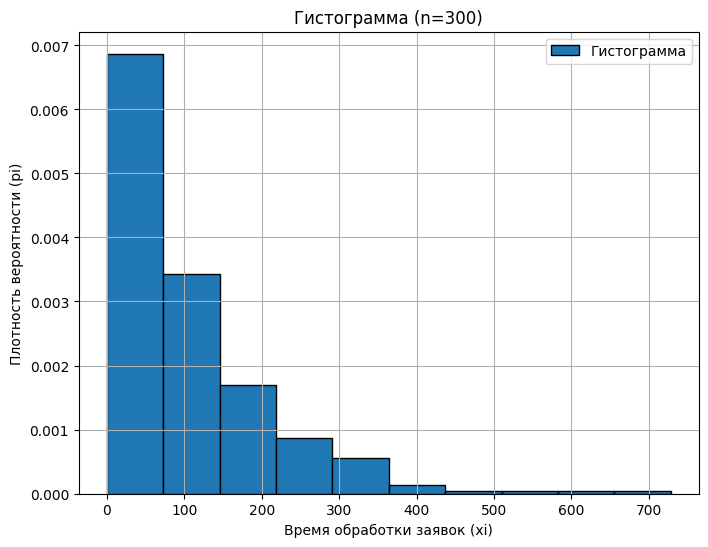

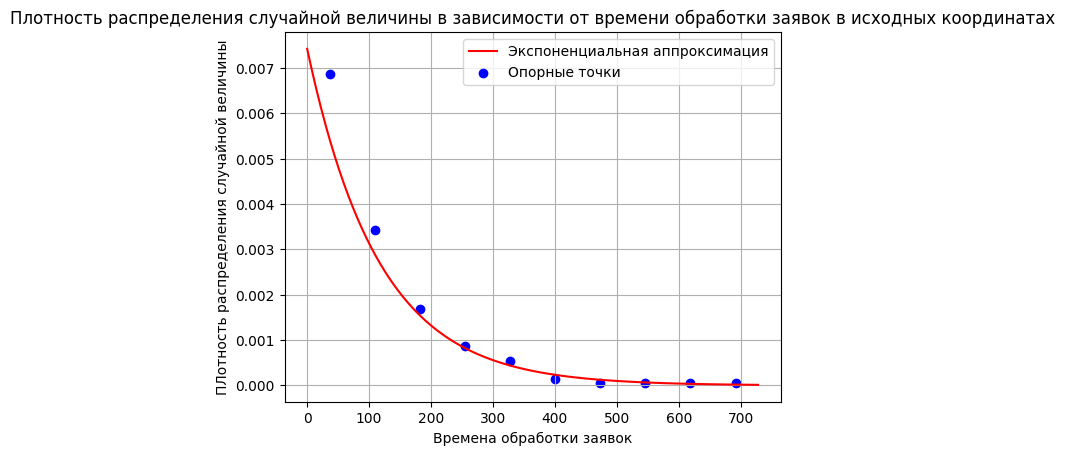

Погрешность коэффициента интенсивности: 13.74%

--- Выполнение заданий для n = 500 ---
Опорные точки (центры интервалов и плотности):
x: 28.92, y: 0.00726
x: 86.73, y: 0.00450
x: 144.55, y: 0.00225
x: 202.37, y: 0.00128
x: 260.19, y: 0.00111
x: 318.00, y: 0.00045
x: 375.82, y: 0.00024
x: 433.64, y: 0.00014
x: 491.46, y: 0.00003
x: 549.27, y: 0.00003
Коэффициенты линейной регрессии: b0 = -4.44364, b1 = -0.01070


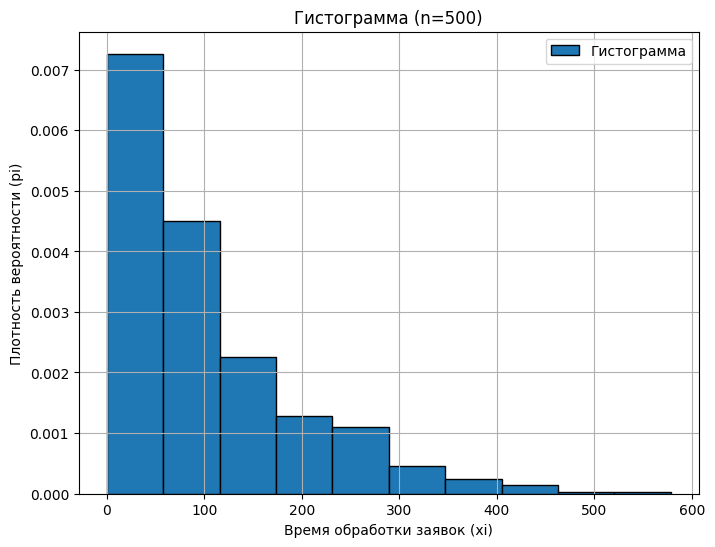

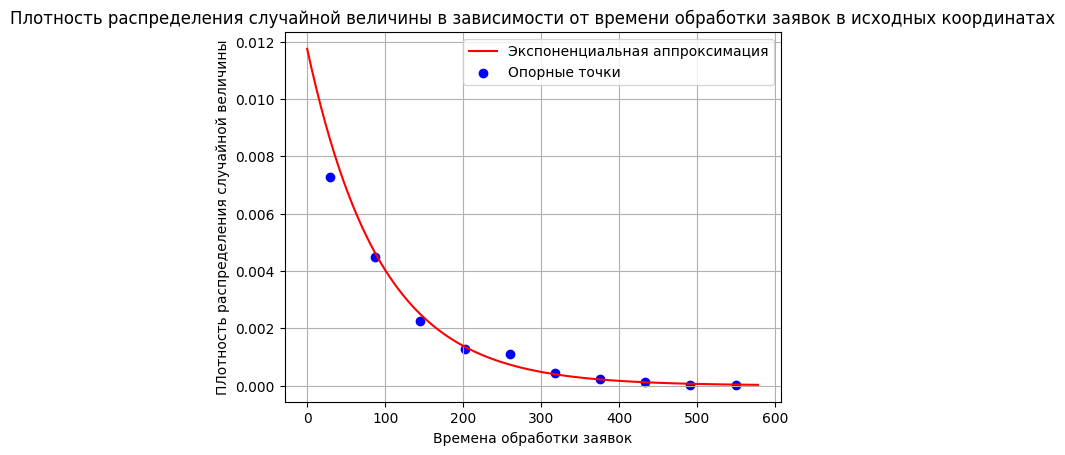

Погрешность коэффициента интенсивности: 6.95%

--- Выполнение заданий для n = 1000 ---
Опорные точки (центры интервалов и плотности):
x: 43.00, y: 0.00649
x: 129.01, y: 0.00293
x: 215.01, y: 0.00110
x: 301.02, y: 0.00064
x: 387.02, y: 0.00026
x: 473.03, y: 0.00008
x: 559.03, y: 0.00009
x: 645.04, y: 0.00001
x: 731.04, y: 0.00001
x: 817.05, y: 0.00001
Коэффициенты линейной регрессии: b0 = -4.81132, b1 = -0.00883


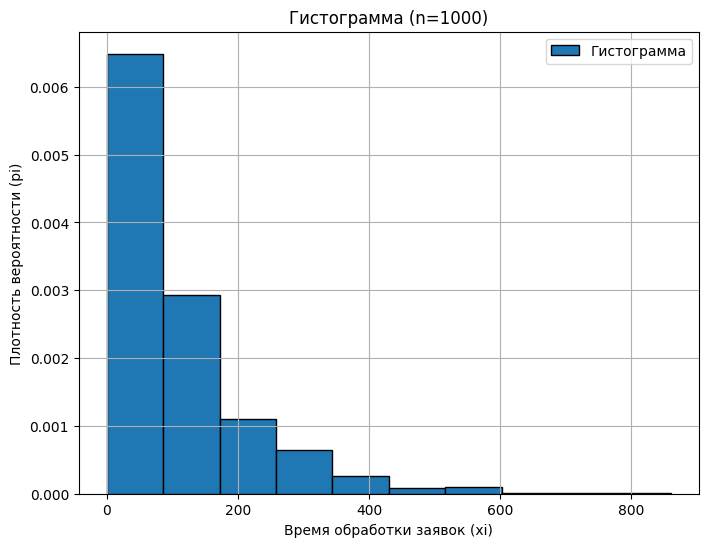

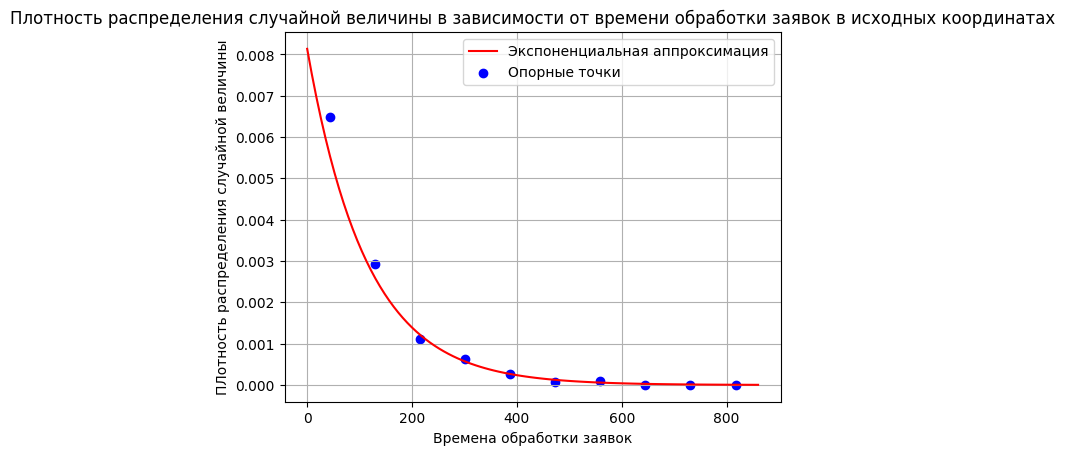

Погрешность коэффициента интенсивности: 11.69%


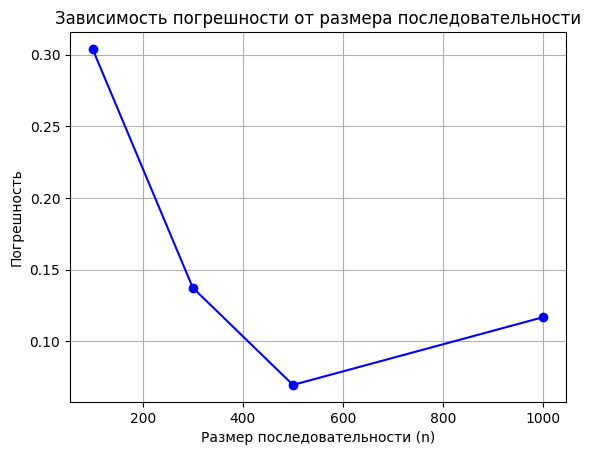

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Функция для генерации экспоненциально распределенных чисел
def generate_exponential_data(n, lambda_val):

    return -np.log(1 - np.random.uniform(0, 1, n)) / lambda_val


# Функция для вычисления коэффициентов линейной регрессии b0 и b1
def calculate_regression_coefficients(x, y):
    n = len(x)
    sum_x = np.sum(x)
    sum_y = np.sum(y)
    sum_xy = np.sum(x * y)
    sum_x2 = np.sum(x**2)

    b1 = (n * sum_xy - sum_x * sum_y) / (n * sum_x2 - sum_x**2)
    b0 = (sum_y - b1 * sum_x) / n
    return b0, b1


# Функция для построения гистограммы и получения опорных точек
def get_histogram_data(data, bins=10):
    hist, edges = np.histogram(data, bins=bins, density=True)
    centers = (edges[:-1] + edges[1:]) / 2  # Центры интервалов
    return centers, hist


# Функция для построения экспоненциальной аппроксимации
def plot_exponential_approximation(t, A, b1):
    f_t = A * np.exp(-b1 * t)
    plt.plot(t, f_t, label="Экспоненциальная аппроксимация", color="red")


# Основная функция для выполнения всех заданий
def main():
    lambda_val = 0.01  # Интенсивность
    n_values = [100, 300, 500, 1000]  # Размеры последовательности для заданий №6 и №7
    errors = []  # Список для хранения погрешностей

    for n in n_values:
        print(f"\n--- Выполнение заданий для n = {n} ---")

        # Задание №1: Генерация данных
        data = generate_exponential_data(n, lambda_val)

        # Задание №2: Построение гистограммы
        centers, densities = get_histogram_data(data, bins=10)
        plt.figure(figsize=(8, 6))
        plt.bar(
            centers,
            densities,
            width=centers[1] - centers[0],
            
            edgecolor="black",
            
            label="Гистограмма",
        )

        # Задание №3: Получение координат опорных точек
        print("Опорные точки (центры интервалов и плотности):")
        for center, density in zip(centers, densities):
            print(f"x: {center:.2f}, y: {density:.5f}")

        # Задание №4: Вычисление коэффициентов линейной регрессии
        x = centers
        y = []
        for i in range(len(densities)):
           
            try:
                y.append(math.log(densities[i]))
            except:
                # y.append(0)
                y.append(min(y))

        # y = np.log(densities)  # Переход к логарифмам для линейной регрессии
        b0, b1 = calculate_regression_coefficients(x, y)
        print(f"Коэффициенты линейной регрессии: b0 = {b0:.5f}, b1 = {b1:.5f}")

       

        # Задание №5: Построение графика плотности
        plt.xlabel("Время обработки заявок (xi)")
        plt.ylabel("Плотность вероятности (pi)")
        plt.title(f"Гистограмма (n={n})")
        plt.legend()
        plt.grid()
        plt.show()

         # Экспоненциальная аппроксимация
        A = np.exp(b0)
        t = np.linspace(0, max(data), 100)
        plot_exponential_approximation(t, A, -b1)
        plt.scatter(centers, densities, color="blue", label="Опорные точки")
        plt.xlabel("Времена обработки заявок")
        plt.ylabel("ПЛотность распределения случайной величины")
        plt.grid()
        plt.legend()
        plt.title("Плотность распределения случайной величины в зависимости от времени обработки заявок в исходных координатах")
        plt.show()

        # Задание №6: Погрешность
        theoretical_lambda = lambda_val
        calculated_lambda = -b1
        error = abs(theoretical_lambda - calculated_lambda) / theoretical_lambda
        errors.append(error)
        print(f"Погрешность коэффициента интенсивности: {error:.2%}")

    # Задание №7: График зависимости погрешности от размера последовательности
    # plt.figure(figsize=(8, 6))
    plt.plot(n_values, errors, marker="o", linestyle="-", color="blue")
    plt.xlabel("Размер последовательности (n)")
    plt.ylabel("Погрешность")
    plt.title("Зависимость погрешности от размера последовательности")
    plt.grid()
    plt.show()


if __name__ == "__main__":
    main()
